# PyTorch Primer

We'll use Python and [PyTorch](https://pytorch.org/) for the labs in this course. This lab is to help you get up to speed. It will introduce:
- **Tensors**: PyTorch's equivalent of NumPy arrays, but with more bells and whistles for running on GPUs and supporting automatic differentiation.
- **Broadcasting and Fancy Indexing**: If you're coming from Matlab or NumPy, you probably know that you can avoid costly for-loops by broadcasting computation over dimensions of an array (here, tensor) and using fancy indexing tricks.
- **Distributions**: PyTorch has an excellent library of distributions for sampling, evaluating log probabilities, and much more.

We'll introduce these concepts in the context of the Poisson mixture model from class (c.f. [Probabilistic Modeling](../lectures/02_probabilistic_modeling.ipynb)).

In [1]:
import torch
import numpy as np
import torch.distributions as dist
import matplotlib.pyplot as plt

## 1. Constructing Tensors

Tensors are PyTorch's equivalent of NumPy arrays. The PyTorch documentation already has a [great tutorial](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html) on tensors. Rather than recreate the wheel, please start by reading that.

Once you've read through that, try using torch functions like `arange`, `reshape`, etc. to construct the following tensors.

### Problem 1.1

Construct the following tensor:

```
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
```

_Note: For this problems and the ones below, don't literally construct the tensor from the specified list. Use torch functions._

---

In [ ]:
# YOUR CODE HERE
shape = (3, 3)
# .arange provides a 1D tensor with values evenly distributed from 0 to no.prod(shape)- 1 which is the product of the shape (3 * 3)
# .reshape reshapes the tensor to the original (3, 3) shape
tensor = torch.arange(np.prod(shape)).reshape(shape)
print(f"Tensor: \n {tensor}")


Tensor: 
 tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


### Problem 1.2

Construct the following tensor:

```
tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])
```

---

In [ ]:
# YOUR CODE HERE
print(tensor.T) #transpose the tensor

tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])


### Problem 1.3

Construct the following tensor:

```
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
```

_Note: Here the sequence is repeated 3 times. Does your code support arbitrary numbers of repeats?_

---

In [ ]:
# YOUR CODE HERE
tensor = tensor.flatten()[:5] # flatten the first five values of the tensor
tensor = tensor.repeat(1, 3) # repeat the tensor three times in the row direction
print(tensor)

tensor([[0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]])


### Problem 1.4

Construct the following tensor:

```
tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])
```

---

In [ ]:
# YOUR CODE HERE
shape = (3,5)
tensor = tensor.reshape(shape)
print(tensor)

tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])


### Problem 1.5

Construct the following tensor:

```
tensor([[ 1., -2.,  0.,  0.],
        [-2.,  1., -2.,  0.],
        [ 0., -2.,  1., -2.],
        [ 0.,  0., -2.,  1.]])
```

---

In [ ]:
# YOUR CODE HERE
# Create 4x4 tensor full of zeros
shape = (4,4)
zeros_tensor = torch.zeros(shape)

# Fill diagonal with 1.
diag_tensor = zeros_tensor.fill_diagonal_(1.)

# Create Super- and Sub- diagnonal tensors filled with -.2
shape = (3,)
neg_2 = torch.full(shape, -2.)  # Fill with -2
super_diag = torch.diag_embed(tensor, offset = 1)
sub_diag = torch.diag_embed(tensor, offset = -1)

#Add tensors together
tensor = diag_tensor + super_diag + sub_diag
print(tensor)


tensor([[ 1., -2.,  0.,  0.],
        [-2.,  1., -2.,  0.],
        [ 0., -2.,  1., -2.],
        [ 0.,  0., -2.,  1.]])


### Problem 1.6

Construct the following tensor:

```
tensor([[[[0, 1, 2]]]])
```

---

In [ ]:
# YOUR CODE HERE
tensor = torch.arange(3).reshape(1, 1, 1, 3)  # Automatically generate [0,1,2] and reshape

print(tensor)

tensor([[[[0, 1, 2]]]])


## 2. Broadcasting and Fancy Indexing

Your life will be much easier and your code will be much faster once you get the hang of broadcasting and indexing. Start by reading the  [PyTorch documentation](https://pytorch.org/docs/stable/notes/broadcasting.html).

### Problem 2.1

Construct a tensor `X` where `X[i,j] = i + j` by broadcasting a sum of two 1-dimensional tensors.

For example, broadcast a sum to construct the following tensor,

```
tensor([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]])
```        

---

In [ ]:
# YOUR CODE HERE
i_shape = (1, 3)
j_shape = (4,1)
i = torch.arange(3).reshape(i_shape)
j = torch.arange(4).reshape(j_shape)
X = i + j
print(X)

tensor([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]])

### Problem 2.2

Compute a distance matrix `D` where `D[i,j]` is the Euclidean distance between `X[i]` and `X[j]`, with

```
X = torch.arange(10, dtype=float).reshape(5, 2)
```

Your answer should be,

```
tensor([[ 0.0000,  2.8284,  5.6569,  8.4853, 11.3137],
        [ 2.8284,  0.0000,  2.8284,  5.6569,  8.4853],
        [ 5.6569,  2.8284,  0.0000,  2.8284,  5.6569],
        [ 8.4853,  5.6569,  2.8284,  0.0000,  2.8284],
        [11.3137,  8.4853,  5.6569,  2.8284,  0.0000]])
```        

---

In [ ]:
X = torch.arange(10, dtype=float).reshape(5, 2)
# YOUR CODE HERE
D = torch.cdist(X, X, p=2)  # p=2 specifies Euclidean distance
print(D)
print(X)

tensor([[ 0.0000,  2.8284,  5.6569,  8.4853, 11.3137],
        [ 2.8284,  0.0000,  2.8284,  5.6569,  8.4853],
        [ 5.6569,  2.8284,  0.0000,  2.8284,  5.6569],
        [ 8.4853,  5.6569,  2.8284,  0.0000,  2.8284],
        [11.3137,  8.4853,  5.6569,  2.8284,  0.0000]], dtype=torch.float64)
tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.],
        [8., 9.]], dtype=torch.float64)


### Problem 2.3

Extract the submatrix of rows `[2,3]` and columns `[0,1,4]` of the tensor,
```
A = torch.arange(25).reshape(5, 5)
```

Your answer should be,
```
tensor([[10, 11, 14],
        [15, 16, 19]])
```

---

In [ ]:
A = torch.arange(25).reshape(5, 5)
# YOUR CODE HERE
submatrix = A[[2, 3],:][:,[0, 1, 4]]
print(f"{A} \n")
print(submatrix)

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]]) 

tensor([[10, 11, 14],
        [15, 16, 19]])


### Problem 2.4

Create a binary mask matrix `M` of the same shape as `A` where `M[i,j]` is True if and only if `A[i,j]` is divisible by 7. Let

```
A = torch.arange(25).reshape(5, 5)
```

Your answer should be

```
tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True],
        [False, False, False, False, False],
        [False,  True, False, False, False]])
```

---

In [ ]:
A = torch.arange(25).reshape(5, 5)
# YOUR CODE HERE
M = (A % 7 == 0)
print(M)


tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True],
        [False, False, False, False, False],
        [False,  True, False, False, False]])


### Problem 2.5

Add one to the entries in `A` that are divisible by 7. After updating in place, `A` should be,

```
tensor([[ 1,  1,  2,  3,  4],
        [ 5,  6,  8,  8,  9],
        [10, 11, 12, 13, 15],
        [15, 16, 17, 18, 19],
        [20, 22, 22, 23, 24]])
```

---

In [ ]:
# YOUR CODE HERE
A[M] += 1
print(A)

tensor([[ 1,  1,  2,  3,  4],
        [ 5,  6,  8,  8,  9],
        [10, 11, 12, 13, 15],
        [15, 16, 17, 18, 19],
        [20, 22, 22, 23, 24]])


## 3. Distributions

PyTorch has an excellent library of distributions in `torch.distributions`. Read the docs [here](https://pytorch.org/docs/stable/distributions.html).

We will use these distribution objects to construct and fit a Poisson mixture model.

### Problem 3.1

Draw 50 samples from a Poisson distribution with rate 10.

---

In [ ]:
# YOUR CODE HERE
m = dist.Poisson(rate = torch.tensor([10.0]))
samples = m.sample(sample_shape=torch.Size([50]))


### Problem 3.2

One of the awesome thing about PyTorch distributions is that they support broadcasting too.

Construct a matrix `P` where `P[i,j]` equals $\mathrm{Pois}(x=j; \lambda=i)$ for $i=0,\ldots,4$ and $j=0,\ldots,4$.

Your answer should be,
```
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3679, 0.3679, 0.1839, 0.0613, 0.0153],
        [0.1353, 0.2707, 0.2707, 0.1804, 0.0902],
        [0.0498, 0.1494, 0.2240, 0.2240, 0.1680],
        [0.0183, 0.0733, 0.1465, 0.1954, 0.1954]])
```

---

In [ ]:
# YOUR CODE HERE
rate = torch.arange(5).float().unsqueeze(1)
x = torch.arange(5).float()
m = dist.Poisson(rate = rate)

# Create a Poisson distribution with broadcasting
poisson_dist = dist.Poisson(rate = rate)

# Compute probabilities: P[i, j] = Poisson(x=j | lambda=i)
P = poisson_dist.log_prob(x).exp()
print(P)




tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3679, 0.3679, 0.1839, 0.0613, 0.0153],
        [0.1353, 0.2707, 0.2707, 0.1804, 0.0902],
        [0.0498, 0.1494, 0.2240, 0.2240, 0.1680],
        [0.0183, 0.0733, 0.1465, 0.1954, 0.1954]])
tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])
tensor([0., 1., 2., 3., 4.])


### Problem 3.3

Evaluate the log probability of the points `[1.5, 3., 4.2]` under a gamma distribution with shape (aka concentration) 2.0 and inverse scale (aka rate) 1.5.

Your answer should be,

```
tensor([-1.0336, -2.5905, -4.0540])
```

---

In [2]:
# YOUR CODE HERE
x = torch.tensor([1.5, 3., 4.2])
gamma_dist = dist.Gamma(concentration = 2.0, rate = 1.5)
log_prob = gamma_dist.log_prob(x)
print(log_prob)

tensor([-1.0336, -2.5905, -4.0540])


### Problem 3.4

Draw 1000 samples from a Poisson mixture model,

$$
\begin{align*}
p(x) &= \frac{1}{2} \mathrm{Pois}(10.0) + \frac{1}{2} \mathrm{Pois}(2.0)
\end{align*}
$$

Use `matplotlib.pyplot.hist` to plot a normalized histogram of the samples.

---

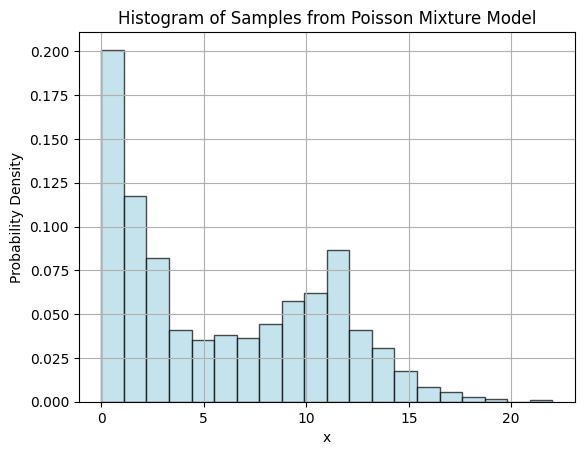

In [21]:
# YOUR CODE HERE
# Set number of samples
num_samples = 1000

# Define the two Poisson distributions
pois_10 = dist.Poisson(10.0)
pois_2 = dist.Poisson(2.0)

# Flip a fair coin (Bernoulli) to decide which distribution to sample from
bernoulli = dist.Bernoulli(0.5)
choices = bernoulli.sample((num_samples,))

# Sample from both distributions
samples_10 = pois_10.sample((num_samples,))
samples_2 = pois_2.sample((num_samples,))

# Select samples based on choices
samples = torch.where(choices.bool(), samples_10, samples_2)

# Plot histogram
plt.hist(samples.numpy(), bins=20, density=True, alpha=0.7, color='lightblue', edgecolor='black')
plt.title('Histogram of Samples from Poisson Mixture Model')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()


## 4. MAP estimation

### Problem 4.1

Let `data` be the samples from above. Assume there are $K = 2$ clusters and the prior cluster probabilities $[\tfrac{1}{2}, \tfrac{1}{2}]$ are known. Complete the code below to perform MAP estimation.

---


estimated rates: tensor([ 2.1192, 10.3164])


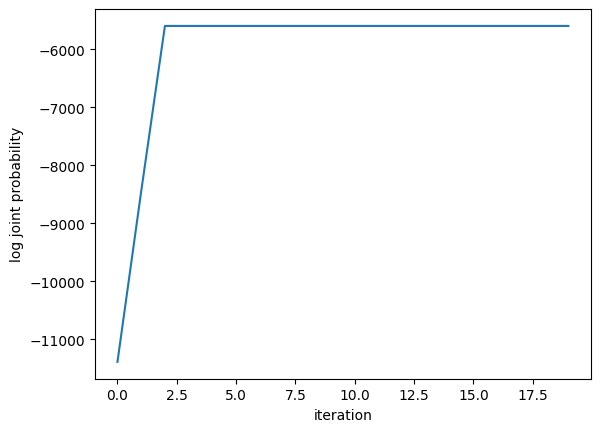

In [25]:
def update_assignments(data, rates, probs):
    """Update the cluster assignments ($z$) given the data, rates,
    and cluster probabilities.

    Args:
        data: shape `(N,)` tensor of counts
        rates: shape `(K,)` tensor of nonnegative rates for each cluster.
        probs: shape `(K,)` tensor of cluster probabilities

    Returns:
        assignments: shape `(N,)` tensor of integer cluster assignments
    """
    ## YOUR CODE HERE
   # Compute log-probabilities for each cluster
    log_probs = torch.stack([
        dist.Poisson(rate=rates[k]).log_prob(data) + torch.log(probs[k])
        for k in range(len(rates))
    ])  # Shape: (K, N)

    # Choose the cluster with the highest log-probability
    assignments = torch.argmax(log_probs, dim=0)  # Shape: (N,)
    ##


    return assignments

def update_rates(data, assignments, shape=1.0, inv_scale=1.0):
    """Update the rates for each cluster under a gamma prior.

    Args:
        data: shape `(N,)` tensor of counts
        assignments: shape `(N,)` tensor of integer cluster assignments
        shape: shape (aka concentration) of gamma prior. Defaults to 1.0.
        inv_scale: inverse scale (aka rate) of gamma prior. Defaults to 1.0.

    Returns:
        rates: shape `(K,)` tensor of updated rates for each cluster
    """
    ##
    # YOUR CODE HERE
    K = torch.max(assignments).item() + 1  # number of clusters
    rates = torch.zeros(K)

    for k in range(K):
        cluster_data = data[assignments == k]
        total_count = cluster_data.sum()
        num_points = cluster_data.shape[0]

        posterior_shape = shape + total_count
        posterior_rate = inv_scale + num_points

        rates[k] = posterior_shape / posterior_rate
    ##
    return rates


def log_joint(data, assignments, rates, probs, shape=1.0, inv_scale=1.0):
    """_summary_

    Args:
        data: shape `(N,)` tensor of counts
        assignments: shape `(N,)` tensor of integer cluster assignments
        rates: shape `(K,)` tensor of updated rates for each cluster
        probs: shape `(K,)` tensor of cluster probabilities
        shape: shape (aka concentration) of gamma prior. Defaults to 1.0.
        inv_scale: inverse scale (aka rate) of gamma prior. Defaults to 1.0.

    Returns:
        lp: scalar log joint probability under the mixture model
    """
    ###
    # YOUR CODE HERE
    K = rates.shape[0]

    # 1. Likelihood and assignment prior terms
    log_likelihood = 0.0
    for k in range(K):
        # Get data for cluster k
        cluster_data = data[assignments == k]

        # Log-likelihood under Poisson
        if cluster_data.numel() > 0:  # Avoid empty cluster
            log_likelihood += dist.Poisson(rates[k]).log_prob(cluster_data).sum()

            # Add log prior of assignment: log p(z_i = k)
            log_likelihood += cluster_data.shape[0] * torch.log(probs[k])

    # 2. Prior over Poisson rates (Gamma prior)
    gamma_prior = dist.Gamma(shape, inv_scale)
    log_prior_rates = gamma_prior.log_prob(rates).sum()

    # 3. Total log joint
    lp = log_likelihood + log_prior_rates
    ##
    return lp

# Run coordinate ascent for some number of iterations, starting
# with random cluster assignments
probs = torch.ones(2) / 2.0
assignments = torch.randint(0, 2, data.shape)
rates = 10 * torch.rand(2)

lps = []
for i in range(20):
    lps.append(log_joint(data, assignments, rates, probs))
    rates = update_rates(data, assignments)
    assignments = update_assignments(data, rates, probs)

plt.plot(lps)
plt.xlabel("iteration")
plt.ylabel("log joint probability")

print("estimated rates:", rates)

### Problem 4.2 (Bonus)

Now consider a more general model in which

$$
z_n \sim \mathrm{Cat}(\boldsymbol{\pi})
$$

where the prior cluster probabilities $\boldsymbol{\pi}$ are unknown. (Above, we assumed they were known to be $\boldsymbol{\pi} = [\tfrac{1}{2}, \tfrac{1}{2}]$.) Derive and implement a coordinate ascent algorithm for MAP estimation of $\mathbf{z}_{\mathsf{MAP}}$, $\boldsymbol{\lambda}_{\mathsf{MAP}}$, and $\boldsymbol{\pi}_{\mathsf{MAP}}$.
